# 과제: Multivariable Logistic Regression을 구현하시오

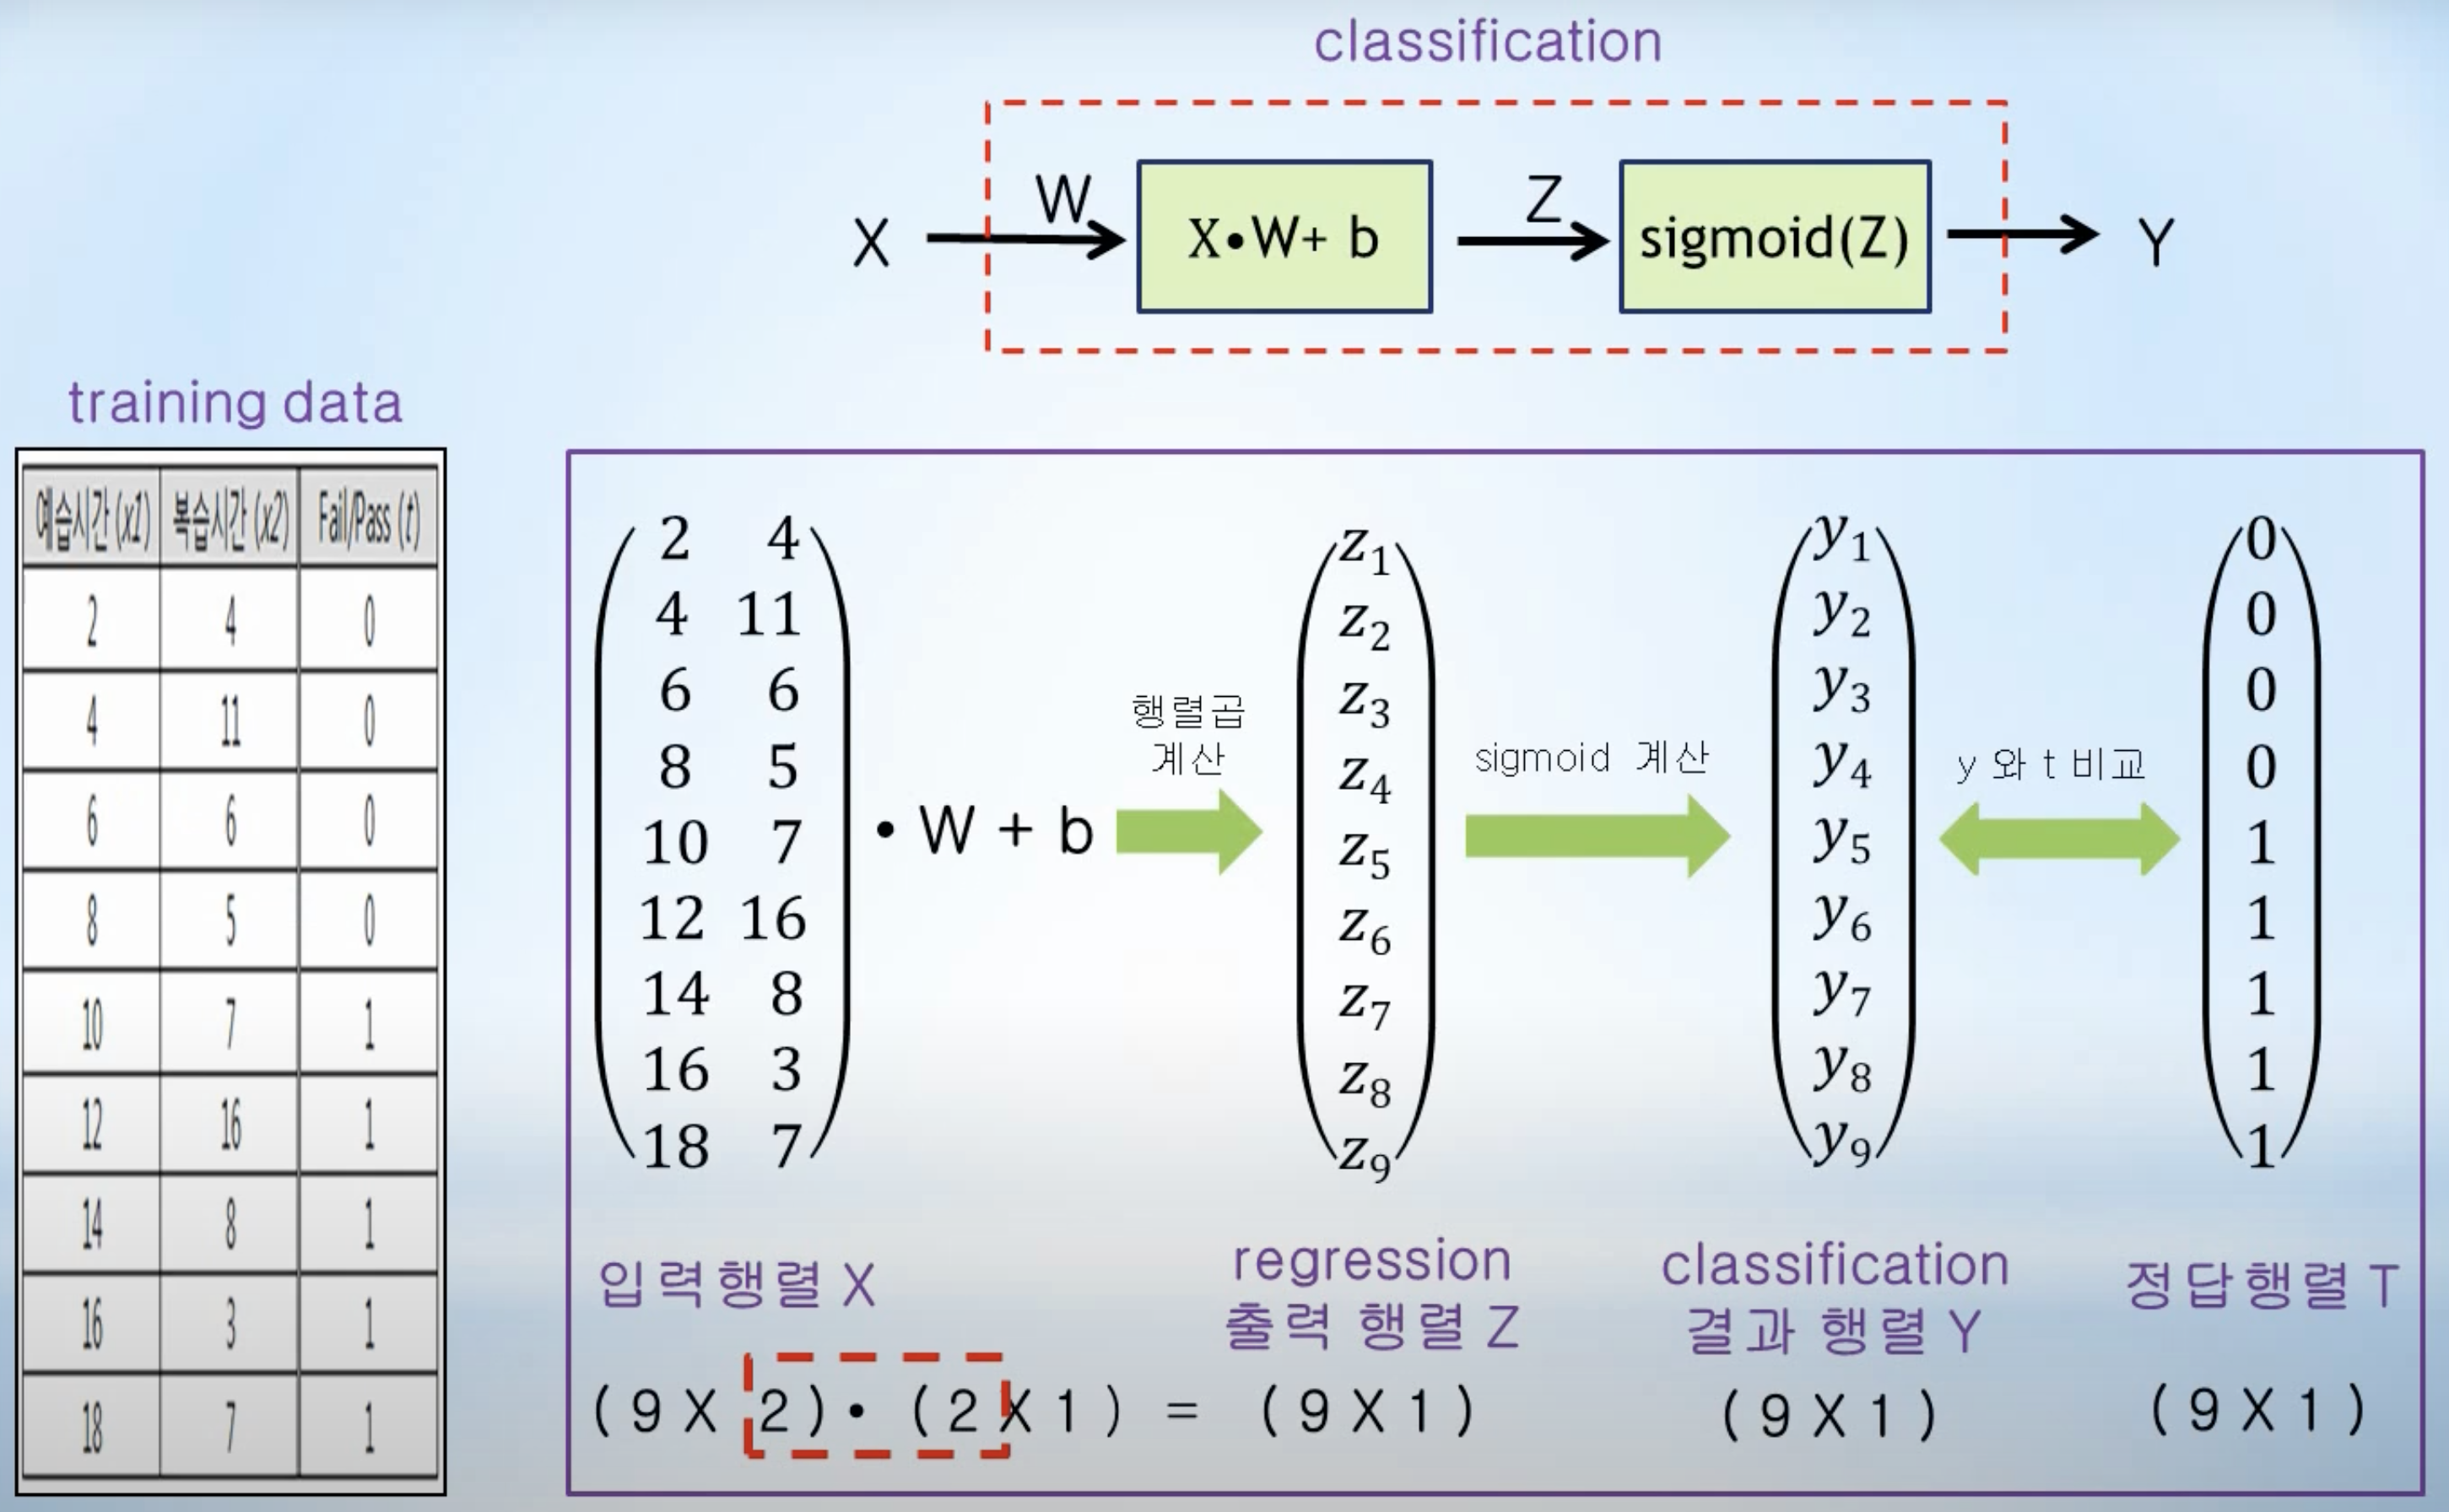


# 1. 데이터 준비

In [1]:
import numpy as np

x_data = np.array([ [2, 4], [4, 11], [6, 6], [8, 5], [10, 7], [12, 16], [14, 8], [16, 3], [18, 7] ])
t_data = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1]).reshape(9, 1)

print("x_data.shape = ", x_data.shape)
print("t_data.shape = ", t_data.shape) 

x_data.shape =  (9, 2)
t_data.shape =  (9, 1)


In [2]:
x_data

array([[ 2,  4],
       [ 4, 11],
       [ 6,  6],
       [ 8,  5],
       [10,  7],
       [12, 16],
       [14,  8],
       [16,  3],
       [18,  7]])

## 2. 데이터 전처리, Scale, 표준화, train/test split

## 3. 모델: 가설함수 설정
 - hypo:
 - logistic function (sigmoid):

### 3-1. hypo:
 - $h(x) = wx+b$

In [3]:
W1 = np.random.rand(2,1)
W2 = np.random.rand(1,1)
b1 = np.random.rand(1)
b2 = np.random.rand(1)

def hypoF(X):
    z1 = np.dot(X, W1) + b1
    return np.dot(z1, W2) + b2

### 3-2. logistic function
 - $ sigmoid(z) = \frac{1}{1+exp^{-z}} $

In [4]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))

## 4. Loss function: binary cross entropy
 - $ P(C=1 | x) = y, P(C=0 | x) = 1-y, P(C=t | x) = y^{t}*(1-y)^{1-t} $
 - likelyhood: L(W, b) = $ \Pi_{i=0}^{n}P(C=t_i | x_i) =  \Pi_{i=0}^{n}y^{t}*(1-y)^{1-t} $
 - negative log likely hood: $ \sum_{i=0}^{n} - t*log(y) - (1-t)log(1-y)$

In [5]:
def bce(X, target):
  z1 = np.dot(X, W1) + b1
  y_hat1 = sigmoid(z1)
  z = np.dot(z1, W2) + b2
  y_hat = sigmoid(z)

  return np.sum(-target*np.log(y_hat)-(1-target)*np.log(1-y_hat))

In [6]:
bce(x_data, t_data)

8.646010897256351

## 5. Gradient 구하기


In [7]:
#loss 대비, parmeter (W, b) 값의 기울기가 어떤가?
def gradient(f, x):
    h = 1e-5
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp = x[idx]
        x[idx] = float(tmp) + h
        fx1 = f(x)
        
        x[idx] = tmp - h 
        fx2 = f(x)
        grad[idx] = (fx1 - fx2) / (2*h)
        
        x[idx] = tmp
        it.iternext()   
        
    return grad


In [8]:
bcef = lambda x: bce(x_data, t_data)

## 6. gradient update
 - $w = w - \alpha \frac{\partial{Cost(W, b)}}{\partial{W}} $

In [9]:
lr = 0.01

for idx in range(1000):

    grad_w1 = gradient(bcef, W1)
    grad_b1 = gradient(bcef, b1)
    grad_w2 = gradient(bcef, W2)
    grad_b2 = gradient(bcef, b2)


    W1 = W1 - lr * grad_w1
    b1 = b1 - lr * grad_b1
    W2 = W2 - lr * grad_w2
    b2 = b2 - lr * grad_b2

    loss = bce(x_data, t_data)

    print("epoch: ", idx, "Loss값: ", loss, "W1값: ", W1, "W2값: ", W2, "b1값: ", b1, "b2값: ", b2)


epoch:  0 Loss값:  7.0096826804449 W1값:  [[0.06778697]
 [0.47130071]] W2값:  [[0.13401685]] b1값:  [0.59238896] b2값:  [0.66853703]
epoch:  1 Loss값:  6.537574859747797 W1값:  [[0.06639505]
 [0.45413656]] W2값:  [[0.06074236]] b1값:  [0.58962694] b2값:  [0.64792757]
epoch:  2 Loss값:  6.396672364602059 W1값:  [[0.06960773]
 [0.44946237]] W2값:  [[0.02076926]] b1값:  [0.58874732] b2값:  [0.63344642]
epoch:  3 Loss값:  6.357053347295384 W1값:  [[0.07151664]
 [0.44853571]] W2값:  [[0.00080151]] b1값:  [0.58852467] b2값:  [0.62272587]
epoch:  4 Loss값:  6.344381179133463 W1값:  [[0.07160757]
 [0.44851428]] W2값:  [[-0.00816671]] b1값:  [0.58851773] b2값:  [0.61407437]
epoch:  5 Loss값:  6.337789877892792 W1값:  [[0.07059313]
 [0.44865999]] W2값:  [[-0.01175625]] b1값:  [0.58857993] b2값:  [0.60645861]
epoch:  6 Loss값:  6.3325021693674435 W1값:  [[0.06907172]
 [0.44881998]] W2값:  [[-0.0129126]] b1값:  [0.58866354] b2값:  [0.59934636]
epoch:  7 Loss값:  6.327558829779664 W1값:  [[0.0673669 ]
 [0.44896893]] W2값:  [[-0.0130057